# Construction pour chaque département ou région d'une série de gt

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import seaborn as sns

On va faire plusieures étapes: 
- on charge les données
- on change le format 
- on standardise les données 
- on crée une base pour chaque département / région 
- on crée une nouvelle base àp de ces bases pour avoir des données mensuelles fusionnables avec les données officielles 
- on fait fonctionner le LASSO pour sélectionner les google trends pertinentes
- on crée un indicateur unique pour chaque département ou région àp des gt sélectionnées 

# Travail sur les gt supplémentaires

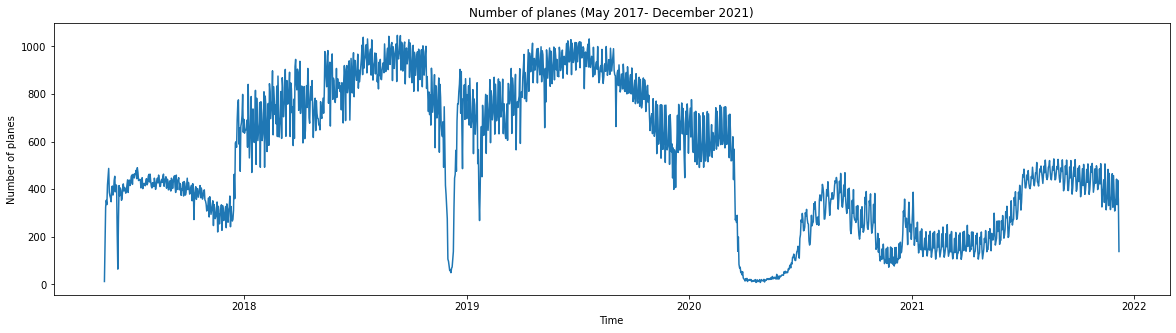

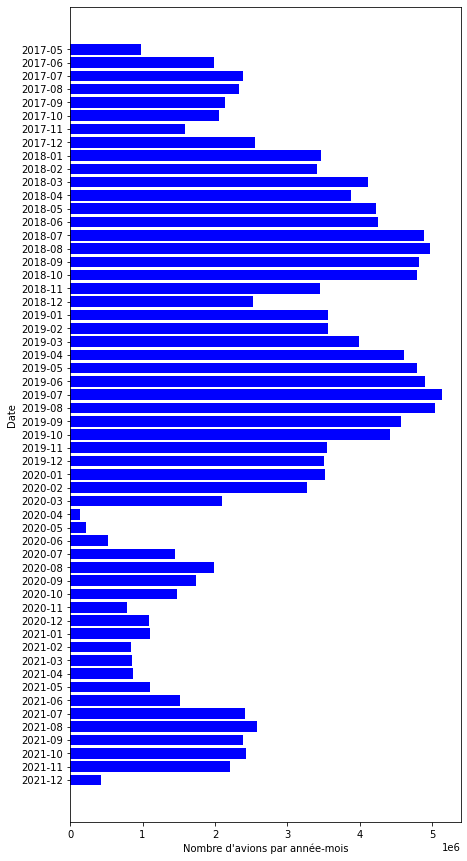

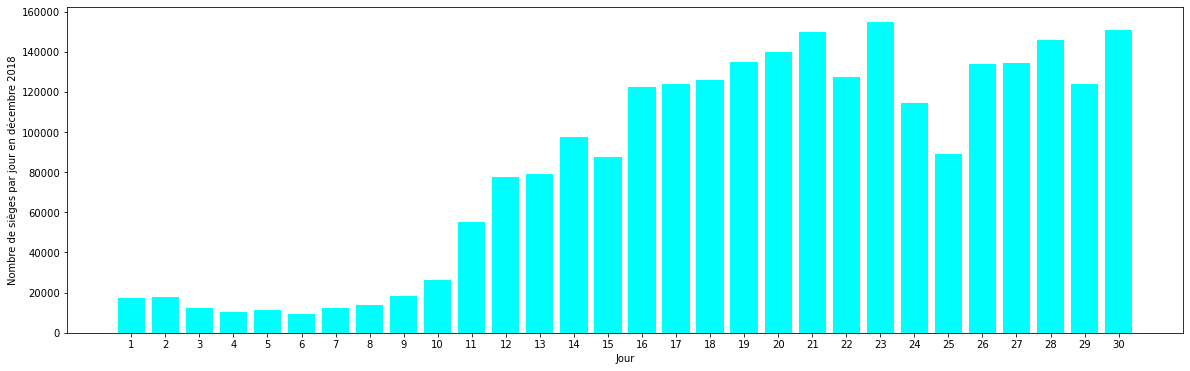

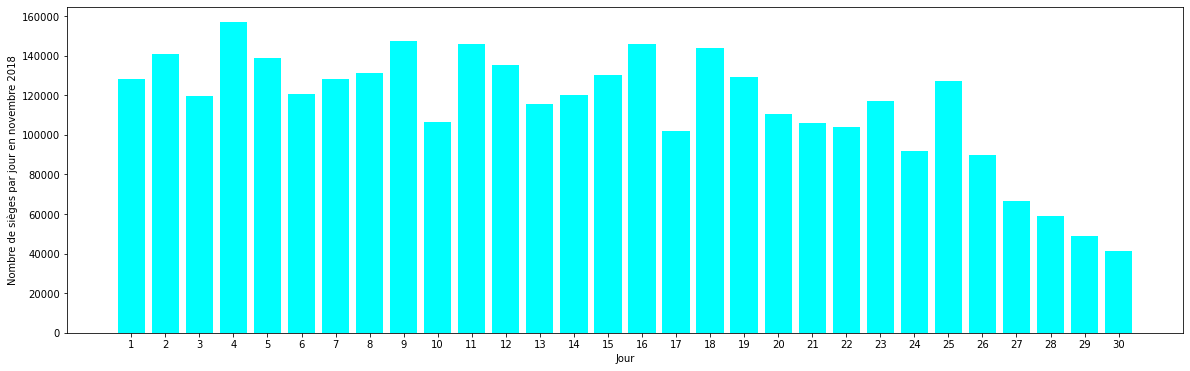

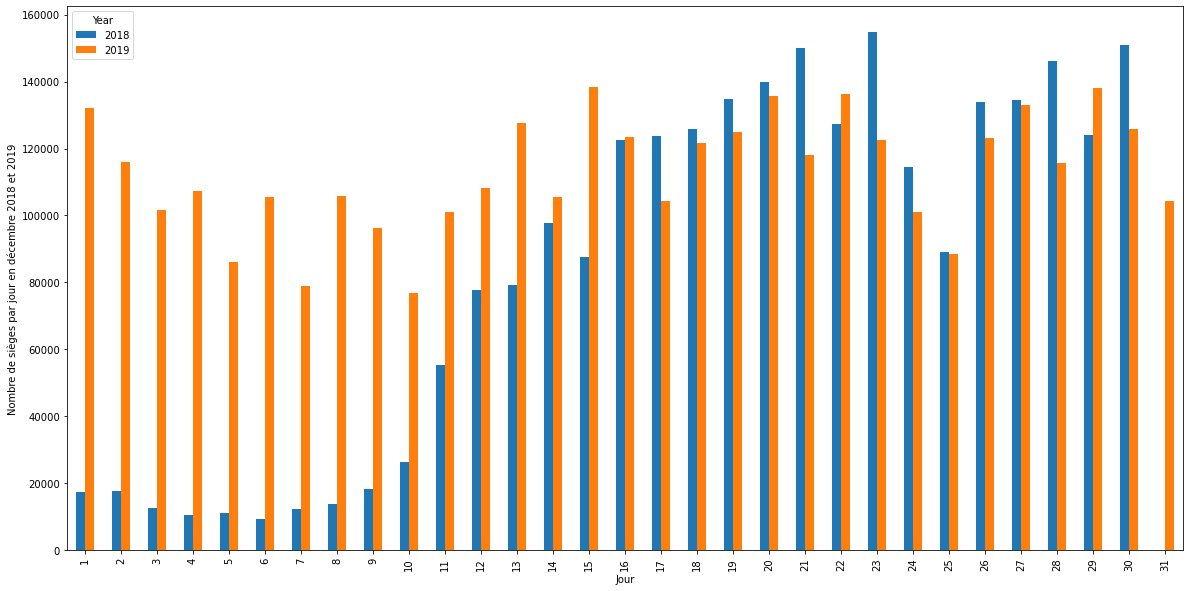

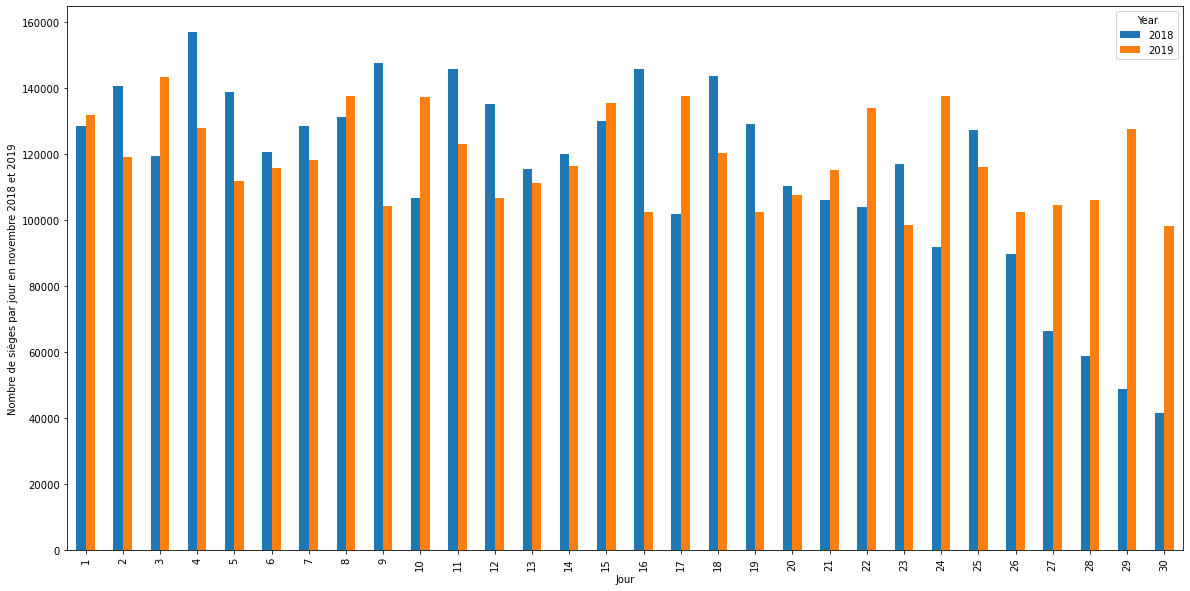

<ipython-input-2-3a4f6729c0f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["Year"]=2018
<ipython-input-2-3a4f6729c0f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2019[['Year', 'Month', 'Day']])
<ipython-input-2-3a4f6729c0f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

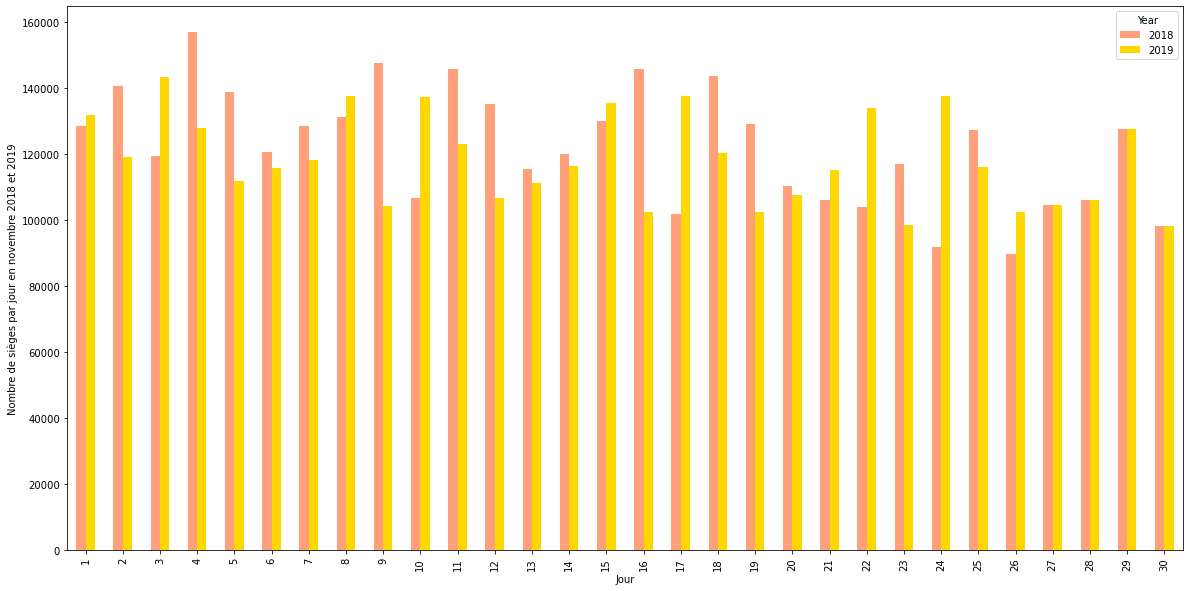

<ipython-input-2-9bdd9c2eca73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["Year"]=2018
<ipython-input-2-9bdd9c2eca73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df2_imput_obs_2019[['Year', 'Month', 'Day']])
<ipython-input-2-9bdd9c2eca73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

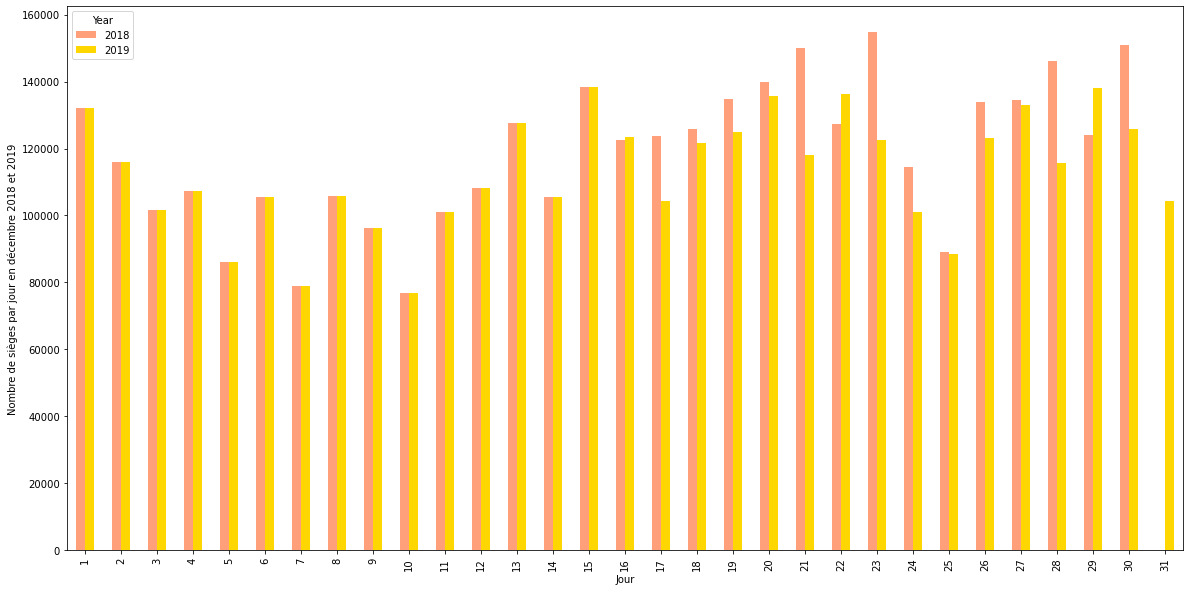

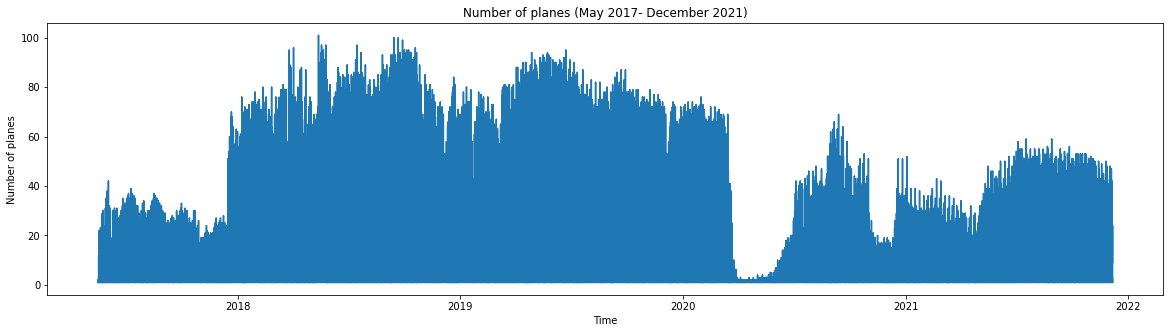

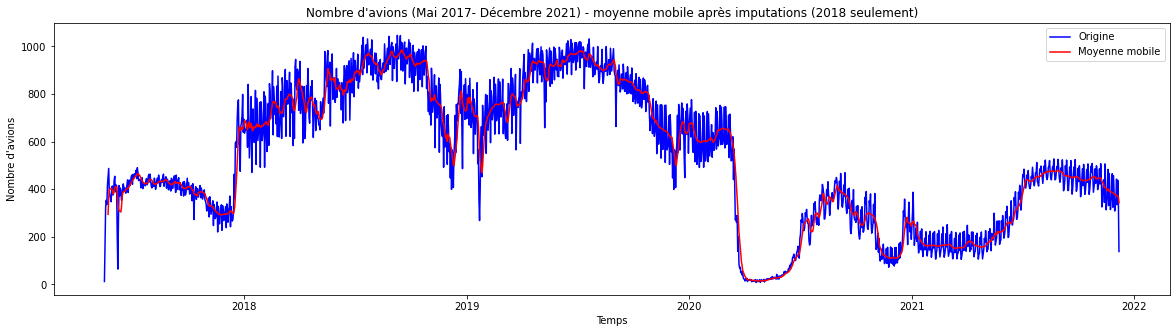

<ipython-input-2-7f0bba5ee52d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_31dec["Year"]=2018
<ipython-input-2-7f0bba5ee52d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_31dec["Month"]=12
<ipython-input-2-7f0bba5ee52d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

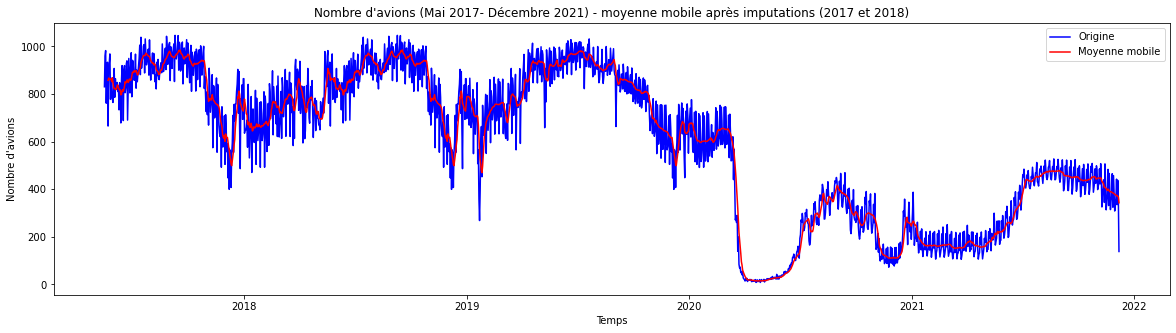

<ipython-input-2-cb2c87f7a7f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_air_traffic_month = df_air_traffic_imput2.groupby([pd.Grouper(key='sheduled_time_start', freq="MS"), "citydest"])['seats', 'number_planes'].sum()
<ipython-input-2-323a6f654225>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_france['stay_date']=pd.to_datetime(df_reviews_france['stay_date'])
<ipython-input-2-323a6f654225>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [2]:
# J'importe les données transformées (base officielle)
%run "Transformations_donnees.ipynb"

In [3]:
# je charge mes données
gt_supplementaire= pd.read_csv('google_trends_fr_2.csv')
gt_supplementaire['date']=pd.to_datetime(gt_supplementaire['date'])

In [4]:
# je change mon format 
gt_supplementaire = gt_supplementaire.reset_index().pivot_table(values = "value", index = "date", columns = "variable")
gt_supplementaire=gt_supplementaire.reset_index()

In [5]:
# je standardise mes données 
gt_supplementaire2=gt_supplementaire.drop(["date"], axis=1)
gt_supplementaire_std = (gt_supplementaire2 - gt_supplementaire2.min(axis=0)) / (gt_supplementaire2.max(axis=0) - gt_supplementaire2.min(axis=0))
gt_supplementaire_dates=gt_supplementaire[["date"]]

In [6]:
# je regroupe tout dans un seul database
gt_supplementaire_std = gt_supplementaire_std.merge(gt_supplementaire_dates, how='inner', left_index=True, right_index=True)
gt_supplementaire_std.head(5)

variable,arcachon theme_cat_voyages,biarritz theme_cat_voyages,bordeaux theme_cat_voyages,caen theme_cat_voyages,la baule theme_cat_voyages,la rochelle theme_cat_voyages,mont saint michel theme_cat_voyages,nantes theme,narbonne theme_cat_voyages,perpignan theme_cat_voyages,date
0,0.182192,0.060473,0.502677,0.178738,0.058113,0.218660,0.251793,0.538425,0.214990,0.245645,2017-01-01
1,0.242055,0.049801,0.576874,0.454321,0.000000,0.226170,0.562151,0.697751,0.098008,0.316966,2017-01-02
2,0.143151,0.039130,0.462206,0.205624,0.047547,0.256210,0.721116,0.697751,0.195493,0.432177,2017-01-03
3,0.114521,0.044465,0.495931,0.346776,0.184906,0.192374,0.486454,0.660262,0.192243,0.300507,2017-01-04
4,0.117123,0.033794,0.468951,0.293004,0.235094,0.154824,0.425896,0.679007,0.091509,0.465094,2017-01-05


In [7]:
# je crée mes bdd pour chaque région touristique 
gt_nouvelle_aquitaine= gt_supplementaire_std[["date", "arcachon theme_cat_voyages", "biarritz theme_cat_voyages", "bordeaux theme_cat_voyages", "la rochelle theme_cat_voyages"]]
gt_pays_loire= gt_supplementaire_std[["la baule theme_cat_voyages", "nantes theme", "date"]]
gt_normandie= gt_supplementaire_std[["mont saint michel theme_cat_voyages", "caen theme_cat_voyages", "date"]]
gt_languedoc= gt_supplementaire_std[["narbonne theme_cat_voyages", "perpignan theme_cat_voyages", "date"]]

In [8]:
# on veut regrouper ces df par mois pour pouvoir les comparer avec les valeurs officielles 
def grouper_par_mois (df):
    """je commence par faire des regroupements par date"""
    df['Year'] = df['date'].dt.year 
    df['Month'] = df['date'].dt.month 
    df['Day'] = df['date'].dt.day 
    df['Year-Month'] = df['date'].dt.strftime('%Y-%m')
    df=df.drop(["date", "Year", "Month","Day"], axis=1)
    df_par_mois=df.groupby('Year-Month').sum()
    
    return df_par_mois    

In [9]:
# je standardise mes sommes obtenues
def standardiser (df):
    """puis je restandardise mes données"""
    df_par_mois=grouper_par_mois(df)
    df_par_mois=df_par_mois.reset_index()
    df_par_mois2=df_par_mois.drop(["Year-Month"], axis=1)
    df_par_mois2 = (df_par_mois2 - df_par_mois2.min(axis=0)) / (df_par_mois2.max(axis=0) - df_par_mois2.min(axis=0))
    df_par_mois_dates=df_par_mois[["Year-Month"]]
    df_par_mois_std = df_par_mois2.merge(df_par_mois_dates, how='inner', left_index=True, right_index=True)
    
    return df_par_mois_std

In [10]:
gt_nouvelle_aquitaine2=standardiser(gt_nouvelle_aquitaine)
gt_pays_loire2=standardiser(gt_pays_loire)
gt_normandie2=standardiser(gt_normandie)
gt_languedoc2=standardiser(gt_languedoc)

<ipython-input-8-dda1596a092e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['date'].dt.year
<ipython-input-8-dda1596a092e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['date'].dt.month
<ipython-input-8-dda1596a092e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [11]:
def base_donnees_officielles_region (liste_departements, df_official_data):
    """on somme les touristes des bons départements"""
    df = df_official_data[df_official_data['department'].isin(liste_departements)]
    df=df.drop(["department"], axis=1)
    df=df.groupby("date").sum()
    df=df.reset_index()
    """on crée un format compatible pour la jointure plus tard """
    df['Year'] = df['date'].dt.year 
    df['Month'] = df['date'].dt.month 
    df['Day'] = df['date'].dt.day 
    df['Year-Month'] = df['date'].dt.strftime('%Y-%m')
    df=df.drop(["date", "Year", "Month","Day"], axis=1)
    return df

In [12]:
# je fais la liste des départements par région:
departements_nouv_aq=["Charente","Charente-Maritime","Corrèze","Creuse","Landes", "Dordogne","Gironde","Lot-et-Garonne", "Pyrénées-Atlantiques", "Deux-Sèvres", "Vienne", "Haute-Vienne"]
departements_normandie=["Calvaodos", "Eure", "Manche", "Orne", "Seine-Maritime"]
departements_loire=["Loire-Atlantique","Maine-et-Loire", "Mayenne", "Sarthe", "Vendée"]
departements_languedoc=["Lot", "Aveyron", "Lozère","Tarn-et-Garonne", "Tarn","Hérault", "Gard","Gers", "Haute-Garonne", "Hautes-Pyréenées", "Ariège", "Aude", "Pyrénées orientales"]

In [13]:
nouvelle_aquitaine_officiel = base_donnees_officielles_region(departements_nouv_aq,df_France_Official_Data2)
pays_loire_officiel = base_donnees_officielles_region(departements_loire,df_France_Official_Data2)
normandie_officiel = base_donnees_officielles_region(departements_normandie,df_France_Official_Data2)
languedoc_officiel = base_donnees_officielles_region(departements_languedoc,df_France_Official_Data2)

In [14]:
# On va fusionner les bases 
base_nouvelle_aquitaine= nouvelle_aquitaine_officiel.merge(gt_nouvelle_aquitaine2, how="inner")
base_pays_loire= pays_loire_officiel.merge(gt_pays_loire2, how="inner")
base_normandie= normandie_officiel.merge(gt_normandie2, how="inner")
base_languedoc= languedoc_officiel.merge(gt_languedoc2, how="inner")

In [15]:
base_nouvelle_aquitaine.head(5)

,value_in_thousands,Year-Month,arcachon theme_cat_voyages,biarritz theme_cat_voyages,bordeaux theme_cat_voyages,la rochelle theme_cat_voyages
0,464.08,2017-01,0.242726,0.045753,0.576691,0.251529
1,566.77,2017-02,0.211391,0.183941,0.526259,0.313479
2,648.61,2017-03,0.275781,0.265642,0.552338,0.447300
3,878.84,2017-04,0.444394,0.327517,0.609528,0.424068
4,869.24,2017-05,0.385961,0.358524,0.701860,0.451155


In [16]:
# je peux faire le LASSO pour la sélection des gt pertinents

def fonction_lasso(df):

    """je définis mon vecteur cible y (à prédire) et mes variables (X, les google trends)"""
    df=df.drop(["Year-Month"], axis = 1)
    y=df["value_in_thousands"].to_numpy()
    X=df.drop(["value_in_thousands"], axis = 1).to_numpy()

    """je sépare mon échantillon"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

    pipeline = Pipeline([
                         ('scaler',StandardScaler()),
                         ('model',Lasso())
    ])

    search = GridSearchCV(pipeline,
                          {'model__alpha':np.arange(0.1,10,0.1)},
                          cv = 5, scoring="neg_mean_squared_error",verbose=3
                          )

    """entrainement"""  
    search.fit(X_train,y_train)
    search.best_params_
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)

    """test""" 
    search.fit(X_test,y_test)
    search.best_params_
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance_finale = np.abs(coefficients)
    importance_finale

    return importance_finale

In [17]:
fonction_lasso(base_nouvelle_aquitaine) # tous les googles trends sont pertinents ici
fonction_lasso(base_languedoc) # pareil
fonction_lasso(base_pays_loire) # pareil
fonction_lasso(base_normandie) # pareil

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-88235.475, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-128291.915, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-27292.123, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-41416.725, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-17335.812, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-88168.110, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.5, score=-27551.269, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-41050.963, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-16922.333, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............... model__alpha=0.6, score=-87921.207, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] .............. model__alpha=0.6, score=-126820.535, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............... model__alpha=0.6, score=-27617.338, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............... model__alpha=0.6, score=-40961.154, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] .

[CV]  model__alpha=1.9000000000000001, score=-87207.330, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-123465.764, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-28020.208, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-39843.851, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-15999.620, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-87157.465, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] .............. model__alpha=2.0, score=-123449.608, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] 

[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-27731.473, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-38587.564, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-15888.476, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-86471.481, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] .............. model__alpha=3.6, score=-123351.645, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-27713.969, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-38513.322, total=   0.0s
[CV] m

[CV] ............... model__alpha=5.0, score=-27475.360, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-37707.814, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-15800.062, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-86295.019, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] .............. model__alpha=5.1, score=-123835.490, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-27458.847, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-37694.571, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] .

[CV] ............... model__alpha=6.5, score=-27233.463, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-37510.110, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-15717.034, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-86346.500, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .............. model__alpha=6.6, score=-124450.486, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-27217.834, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-37497.051, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .

[CV] ............... model__alpha=8.2, score=-15629.248, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-86407.189, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] .............. model__alpha=8.3, score=-125155.784, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-26961.757, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-37277.442, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-15624.293, total=   0.0s
[CV] model__alpha=8.4 ................................................
[CV] ............... model__alpha=8.4, score=-86410.785, total=   0.0s
[CV] model__alpha=8.4 ................................................
[CV] .

[CV] .............. model__alpha=9.9, score=-125833.005, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-26737.413, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-37075.301, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-15548.450, total=   0.0s
Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-43936.136, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-11552.697, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-49216.154, total=   0.0s
[CV] model__alp

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  model__alpha=0.7000000000000001, score=-40324.738, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-23038.476, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-40925.087, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-11724.565, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-44333.819, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-40531.513, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-22792.783, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] .

[CV]  model__alpha=2.4000000000000004, score=-12319.489, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-36188.837, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-43925.165, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-19668.387, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-67284.182, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-12365.820, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-35815.467, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  

[CV] ............... model__alpha=4.2, score=-69397.923, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-13315.856, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-31902.836, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-47934.563, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-17964.990, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-69533.030, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-13381.352, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] .

[CV] ............... model__alpha=5.8, score=-14491.914, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ............... model__alpha=5.8, score=-32426.281, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ............... model__alpha=5.8, score=-51668.733, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ............... model__alpha=5.8, score=-18060.992, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-70740.434, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-14574.501, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-32593.655, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] .

[CV] ............... model__alpha=7.3, score=-36608.719, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ............... model__alpha=7.3, score=-55314.995, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ............... model__alpha=7.3, score=-19523.390, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] ............... model__alpha=7.4, score=-70372.043, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] ............... model__alpha=7.4, score=-15939.990, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] ............... model__alpha=7.4, score=-37016.131, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] ............... model__alpha=7.4, score=-55563.083, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] .

[CV] model__alpha=9.0 ................................................
[CV] ............... model__alpha=9.0, score=-22308.919, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-69954.512, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-17557.771, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-37484.016, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-59875.468, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-22293.967, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-69930.017, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.8, score=-15983.550, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-56782.956, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-40736.309, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-10296.793, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-15085.745, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-15971.538, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ............... model__alpha=1.0, score=-56781.480, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] .

[CV]  model__alpha=2.5000000000000004, score=-56759.749, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-39849.207, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-10197.514, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-15023.482, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-15782.007, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-56758.327, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-39794.796, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ............... model__alpha=4.2, score=-39001.985, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-10106.536, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-14961.013, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ............... model__alpha=4.2, score=-15586.130, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-56734.678, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-38956.283, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-10101.650, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] .

[CV] ............... model__alpha=6.1, score=-56710.704, total=   0.0s
[CV] model__alpha=6.1 ................................................
[CV] ............... model__alpha=6.1, score=-39090.230, total=   0.0s
[CV] model__alpha=6.1 ................................................
[CV] ............... model__alpha=6.1, score=-10022.540, total=   0.0s
[CV] model__alpha=6.1 ................................................
[CV] ............... model__alpha=6.1, score=-14895.691, total=   0.0s
[CV] model__alpha=6.1 ................................................
[CV] ............... model__alpha=6.1, score=-15373.914, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] ............... model__alpha=6.2, score=-56709.404, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] ............... model__alpha=6.2, score=-39112.993, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] .

[CV] ................ model__alpha=7.9, score=-9960.186, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-14838.182, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-15179.395, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-56683.297, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-39528.028, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-9957.213, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-14835.112, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] .

[CV] ............... model__alpha=9.5, score=-15011.822, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-56658.271, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-39905.401, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ................ model__alpha=9.6, score=-9916.680, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-14787.778, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] ............... model__alpha=9.6, score=-15001.516, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] . model__alpha=9.700000000000001, score=-56656.745, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.4, score=-12518.222, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............... model__alpha=0.4, score=-53720.350, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................ model__alpha=0.4, score=-4370.567, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-31139.825, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-26606.982, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-12514.733, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-53765.104, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] .

[CV] ............... model__alpha=2.0, score=-12465.375, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-54441.761, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ................ model__alpha=2.0, score=-4382.247, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-31071.353, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-26359.758, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-12462.283, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-54487.229, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] .

[CV] ............... model__alpha=3.7, score=-26119.101, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ............... model__alpha=3.7, score=-12416.158, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ............... model__alpha=3.7, score=-55220.779, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ................ model__alpha=3.7, score=-4406.920, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-30998.810, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-26104.278, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-12413.486, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  

[CV] ............... model__alpha=5.4, score=-30930.731, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-25870.596, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-12374.084, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-56012.696, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-4444.226, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ............... model__alpha=5.5, score=-30926.482, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ............... model__alpha=5.5, score=-25856.209, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] .

[CV] ............... model__alpha=7.1, score=-30858.606, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ............... model__alpha=7.1, score=-25629.504, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ............... model__alpha=7.1, score=-12339.151, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ............... model__alpha=7.1, score=-56817.511, total=   0.0s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-4494.166, total=   0.0s
[CV] model__alpha=7.2 ................................................
[CV] ............... model__alpha=7.2, score=-30854.370, total=   0.0s
[CV] model__alpha=7.2 ................................................
[CV] ............... model__alpha=7.2, score=-25615.553, total=   0.0s
[CV] model__alpha=7.2 ................................................
[CV] .

[CV] ............... model__alpha=8.7, score=-25409.366, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ............... model__alpha=8.7, score=-12312.797, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ............... model__alpha=8.7, score=-57586.766, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................ model__alpha=8.7, score=-4552.708, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-30729.135, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-25395.825, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-12311.360, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-16015.535, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-4317.819, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-5587.342, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-13843.884, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-7809.642, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-15985.734, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-4321.141, total=   0.0s
[CV] 

[CV] . model__alpha=2.5000000000000004, score=-5448.353, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-13961.075, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................ model__alpha=2.6, score=-7952.376, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-15497.013, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................ model__alpha=2.6, score=-4379.583, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................ model__alpha=2.6, score=-5440.544, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ............... model__alpha=2.7, score=-13968.075, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] .

[CV] ................ model__alpha=4.2, score=-5321.126, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-14081.692, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-8113.079, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-15042.082, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-4441.753, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-5314.009, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV]  model__alpha=4.3999999999999995, score=-14088.894, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV] .

[CV] model__alpha=5.8 ................................................
[CV] ................ model__alpha=5.8, score=-5212.127, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-14198.346, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-8280.743, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-14644.778, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-4503.670, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-5205.660, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-14205.737, total=   0.0s
[CV] m

[CV] ................ model__alpha=7.6, score=-4573.074, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ................ model__alpha=7.6, score=-5101.955, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-14333.209, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-8488.391, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-14233.591, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-4577.273, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-5096.221, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] .

[CV] ................ model__alpha=9.6, score=-4995.007, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] . model__alpha=9.700000000000001, score=-14487.564, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] .. model__alpha=9.700000000000001, score=-8742.738, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] . model__alpha=9.700000000000001, score=-13821.145, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] .. model__alpha=9.700000000000001, score=-4663.954, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] .. model__alpha=9.700000000000001, score=-4990.087, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ............... model__alpha=9.8, score=-14495.406, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] model__alpha=0.7000000000000001 .................................
[CV] . model__alpha=0.7000000000000001, score=-6749.551, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-13507.268, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-64469.130, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-20730.633, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-17952.591, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-6744.170, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-13513.013, total=   0.0s
[CV] m

[CV]  model__alpha=2.5000000000000004, score=-64070.616, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-21992.317, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-17049.075, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................ model__alpha=2.6, score=-6649.246, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-13617.421, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-64048.688, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ............... model__alpha=2.6, score=-22063.562, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ............... model__alpha=4.2, score=-16258.100, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-6562.968, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-13717.778, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-63679.312, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-23293.269, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ............... model__alpha=4.3, score=-16213.458, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV] . model__alpha=4.3999999999999995, score=-6557.995, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV]  

[CV] ............... model__alpha=5.9, score=-24482.635, total=   0.0s
[CV] model__alpha=5.9 ................................................
[CV] ............... model__alpha=5.9, score=-15527.690, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-6479.966, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-13819.835, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-63316.367, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-24558.001, total=   0.0s
[CV] model__alpha=6.0 ................................................
[CV] ............... model__alpha=6.0, score=-15486.610, total=   0.0s
[CV] model__alpha=6.1 ................................................
[CV] .

[CV] ............... model__alpha=7.5, score=-25703.028, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ............... model__alpha=7.5, score=-14895.570, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ................ model__alpha=7.6, score=-6404.838, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-13917.440, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-62980.646, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-25780.332, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-14857.844, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] .

[CV] model__alpha=9.3 ................................................
[CV] ............... model__alpha=9.3, score=-14022.795, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ............... model__alpha=9.3, score=-62630.184, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ............... model__alpha=9.3, score=-27113.055, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ............... model__alpha=9.3, score=-14248.562, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-6323.787, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-14029.046, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-62609.769, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.2, score=-17079.498, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-8887.329, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-10951.705, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-4654.132, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-3069.244, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-17076.697, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-8901.007, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] 

[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-17040.870, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] . model__alpha=1.9000000000000001, score=-9127.260, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV]  model__alpha=1.9000000000000001, score=-10975.587, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] . model__alpha=1.9000000000000001, score=-4530.473, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] . model__alpha=1.9000000000000001, score=-3058.912, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-17039.193, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ................ model__alpha=2.0, score=-9141.863, total=   0.0s
[CV] m

[CV] . model__alpha=3.5000000000000004, score=-4425.109, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] . model__alpha=3.5000000000000004, score=-3060.948, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-17021.338, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-9382.930, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-11010.362, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-4418.879, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-3061.454, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] .

[CV] ............... model__alpha=5.4, score=-17021.470, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-9670.796, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-11059.056, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-4313.869, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-3078.178, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ............... model__alpha=5.5, score=-17022.105, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ................ model__alpha=5.5, score=-9687.305, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] .

[CV] ............... model__alpha=7.2, score=-11119.961, total=   0.0s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-4222.385, total=   0.0s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-3109.337, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ............... model__alpha=7.3, score=-17044.834, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ................ model__alpha=7.3, score=-9993.798, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ............... model__alpha=7.3, score=-11123.703, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] ................ model__alpha=7.3, score=-4217.699, total=   0.0s
[CV] model__alpha=7.3 ................................................
[CV] .

[CV] ............... model__alpha=9.0, score=-11193.080, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ................ model__alpha=9.0, score=-4144.426, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ................ model__alpha=9.0, score=-3154.930, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-17088.969, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-10317.936, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-11197.500, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-4140.491, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ model__alpha=0.9, score=-3388.657, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-12278.014, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-9743.052, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-1184.008, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ................ model__alpha=1.0, score=-2674.507, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ................ model__alpha=1.0, score=-3392.759, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ............... model__alpha=1.0, score=-12264.180, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] .

[CV] ................. model__alpha=2.7, score=-976.016, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-2621.935, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-3467.365, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-12022.084, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-10232.116, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] .. model__alpha=2.8000000000000003, score=-965.469, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-2619.042, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] .

[CV] ................ model__alpha=4.9, score=-2561.781, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ................ model__alpha=4.9, score=-3556.253, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ............... model__alpha=4.9, score=-11756.237, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ............... model__alpha=4.9, score=-10761.306, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ................. model__alpha=4.9, score=-768.505, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................ model__alpha=5.0, score=-2558.949, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................ model__alpha=5.0, score=-3560.535, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] .

[CV] ................ model__alpha=6.6, score=-2514.015, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-3629.666, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-11554.119, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-11207.104, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................. model__alpha=6.6, score=-643.341, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-2511.232, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-3634.025, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] .

[CV] ............... model__alpha=8.2, score=-11374.591, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ............... model__alpha=8.2, score=-11640.905, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................. model__alpha=8.2, score=-553.561, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-2467.082, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-3704.382, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-11363.715, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ............... model__alpha=8.3, score=-11668.475, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] .

[CV] ................ model__alpha=9.9, score=-2423.669, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ................ model__alpha=9.9, score=-3775.894, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-11195.211, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ............... model__alpha=9.9, score=-12116.934, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ................. model__alpha=9.9, score=-487.942, total=   0.0s


[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.1s finished


array([ 9.69198866, 98.9487711 ])

Comme tous les google trends se sont révélés être pertinents, on peut garder les bases qu'on avait créées:(format: gt_nouvelle_aquitaine)

In [18]:
def gt_moyenne(df):
    df=df.set_index("date")
    df["moyenne"]=df.mean(axis=1,skipna = True)
    df=df.reset_index()

    #on représente graphiquement
    x=df[["date"]]
    y=df[["moyenne"]]
    z = df["moyenne"].rolling(window = 14).mean()
    fig = plt.figure(1, figsize=(20, 5))
    plt.plot(x, z)
    plt.title('Tourisme prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
    plt.xlabel('Date')
    plt.ylabel("Valeur de l'indicateur")
    plt.legend()

    return df

In [19]:
gt_nouvelle_aquitaine= gt_supplementaire_std[["date", "arcachon theme_cat_voyages", "biarritz theme_cat_voyages", "bordeaux theme_cat_voyages", "la rochelle theme_cat_voyages"]]
gt_pays_loire= gt_supplementaire_std[["la baule theme_cat_voyages", "nantes theme", "date"]]
gt_normandie= gt_supplementaire_std[["mont saint michel theme_cat_voyages", "caen theme_cat_voyages", "date"]]
gt_languedoc= gt_supplementaire_std[["narbonne theme_cat_voyages", "perpignan theme_cat_voyages", "date"]]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en Nouvelle-Aquitaine: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

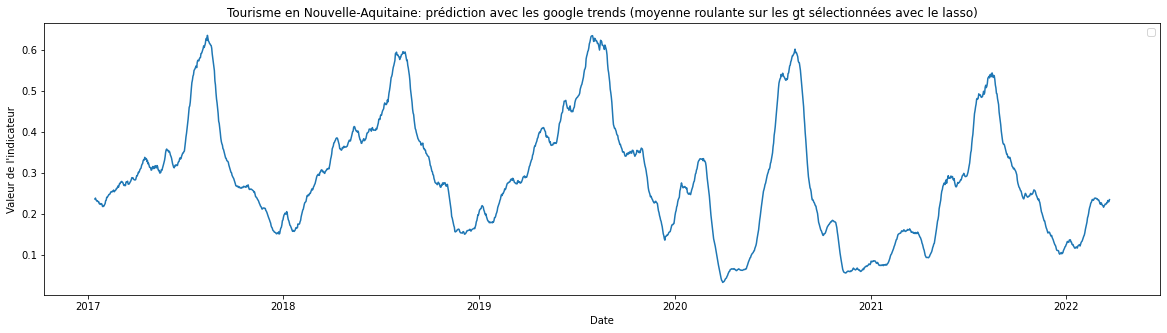

In [20]:
gt_moyenne(gt_nouvelle_aquitaine)
plt.title('Tourisme en Nouvelle-Aquitaine: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en Languedoc-Roussillon / Midi-Pyrénées: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

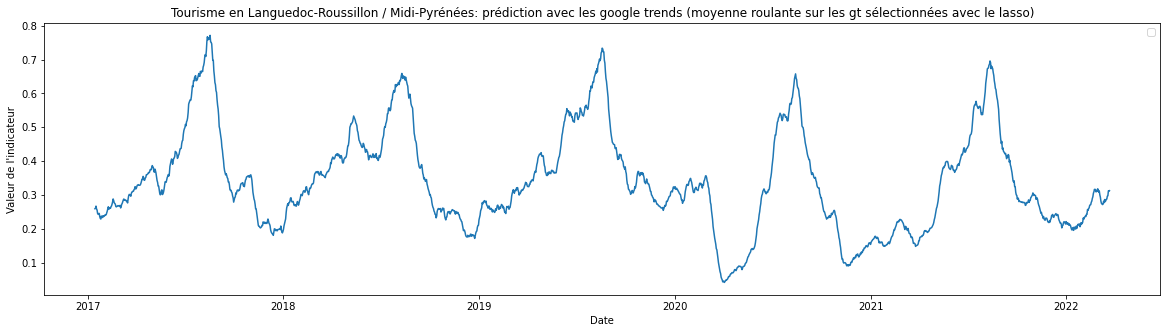

In [21]:
gt_moyenne(gt_languedoc)
plt.title('Tourisme en Languedoc-Roussillon / Midi-Pyrénées: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme dans les Pays de la Loire: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

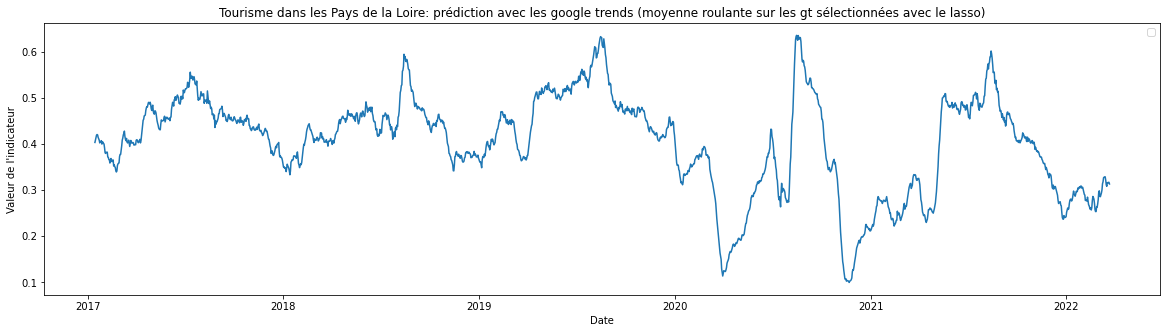

In [22]:
gt_moyenne(gt_pays_loire)
plt.title('Tourisme dans les Pays de la Loire: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en Normandie: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

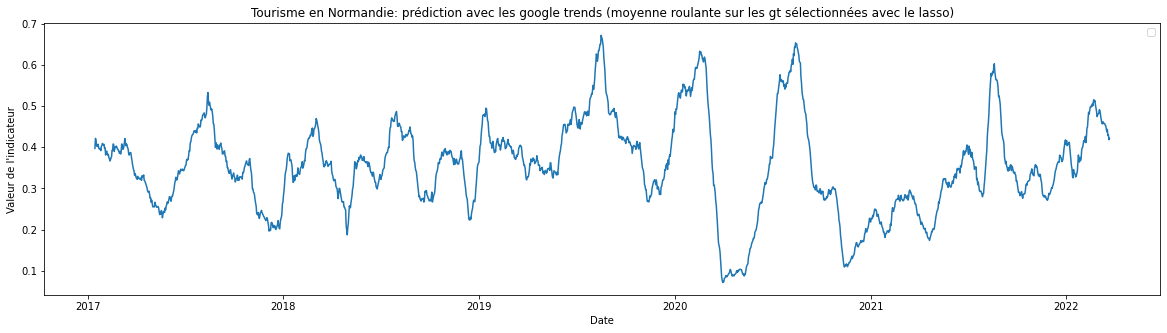

In [23]:
gt_moyenne(gt_normandie)
plt.title('Tourisme en Normandie: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

# Travail sur la première série

In [24]:
# je charge mes données
gt_initial= pd.read_csv('google_trends_fr_1.csv')
gt_initial['date']=pd.to_datetime(gt_initial['date'])

In [25]:
# je change mon format 
gt_initial = gt_initial.reset_index().pivot_table(values = "value", index = "date", columns = "variable")
gt_initial=gt_initial.reset_index()

In [26]:
# je standardise mes données 
gt_initial2=gt_initial.drop(["date"], axis=1)
gt_initial_std = (gt_initial2 - gt_initial2.min(axis=0)) / (gt_initial2.max(axis=0) - gt_initial2.min(axis=0))
gt_initial_dates=gt_initial[["date"]]

In [27]:
# je regroupe tout dans un seul database
gt_initial_std = gt_initial_std.merge(gt_initial_dates, how='inner', left_index=True, right_index=True)
gt_initial_std.head(5)

variable,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,french riviera_cat_voyages,louvre_cat_voyages,lyon gare_cat_voyages,lyon hotel_cat_voyages,...,mucem theme,nice airport_cat_voyages,nice hotel_cat_voyages,nice_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,promenade des anglais_cat_voyages,date
0,0.159773,0.692308,0.086556,0.578391,0.553062,0.685301,0.0,0.409687,0.134831,0.386122,...,0.210,0.153571,0.087609,0.245768,0.291196,0.576359,0.113548,0.674260,0.0,2017-01-01
1,0.315227,0.290769,0.255111,0.265747,0.749789,0.728252,0.0,0.294687,0.339775,0.263265,...,0.090,0.257143,0.222391,0.307837,0.241630,0.804573,0.184516,0.701725,0.1,2017-01-02
2,0.302273,0.304615,0.173111,0.586207,0.615657,0.616580,0.0,0.136563,0.291236,0.491429,...,0.000,0.160714,0.350435,0.280251,0.346957,0.616048,0.709677,0.610177,0.0,2017-01-03
3,0.345455,0.214615,0.136667,0.336092,0.553062,0.565040,0.0,0.280313,0.431461,0.675714,...,0.000,0.121429,0.491957,0.307837,0.229239,0.913719,0.532258,0.610177,0.0,2017-01-04
4,0.349773,0.249231,0.177667,0.640920,0.535178,0.504909,0.0,0.287500,0.145618,0.377347,...,0.085,0.125000,0.283043,0.218182,0.390326,0.586281,0.539355,0.591867,0.0,2017-01-05


In [28]:
# je crée mes bdd pour chaque région touristique 
gt_paris= gt_initial_std.drop(["marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages", "nice airport_cat_voyages","marseille_cat_voyages", "marseille station_cat_voyages","lyon_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","lyon gare_cat_voyages","lyon hotel_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"], axis=1)
gt_rhône= gt_initial_std[["date","lyon gare_cat_voyages", "lyon hotel_cat_voyages"]]
gt_paca_marseille= gt_initial_std[["date","marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages","marseille station_cat_voyages", "marseille_cat_voyages"]]
gt_paca_nice= gt_initial_std[["date","nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"]]
gt_disneyland= gt_initial_std[["date","disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages", "disneyland paris_cat_voyages"]]

In [29]:
# on regroupe par mois 
gt_paris2=standardiser(gt_paris)
gt_rhône2=standardiser(gt_rhône)
gt_paca_marseille2=standardiser(gt_paca_marseille)
gt_paca_nice2=standardiser(gt_paca_nice)
gt_disneyland2=standardiser(gt_disneyland)

<ipython-input-8-dda1596a092e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['date'].dt.year
<ipython-input-8-dda1596a092e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['date'].dt.month
<ipython-input-8-dda1596a092e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [30]:
# je fais la liste des départements par région:
departements_paris=["Paris"]
departements_disney=["Seine-et-Marne"]
departements_paca_nice=["Alpes-Maritimes", "Hautes-Alpes", "Alpes de Haute-Provence"]
departements_paca_marseille=["Bouches-du-Rhône", "Var","Vaucluse"]
departements_rhône=["Loire", "Rhône","Ain", "Haute-Savoie", "Ardèche", "Drôme", "Isère", "Savoie"]

In [31]:
paris_officiel = base_donnees_officielles_region(departements_paris,df_France_Official_Data2)
disneyland_officiel = base_donnees_officielles_region(departements_disney,df_France_Official_Data2)
paca_nice_officiel = base_donnees_officielles_region(departements_paca_nice,df_France_Official_Data2)
paca_marseille_officiel = base_donnees_officielles_region(departements_paca_marseille,df_France_Official_Data2)
rhone_officiel = base_donnees_officielles_region(departements_rhône,df_France_Official_Data2)

In [32]:
# On va fusionner les bases 
base_paris= paris_officiel.merge(gt_paris2, how="inner")
base_disney= disneyland_officiel.merge(gt_disneyland2, how="inner")
base_nice= paca_nice_officiel.merge(gt_paca_nice2, how="inner")
base_marseille= paca_marseille_officiel.merge(gt_paca_marseille2, how="inner")
base_rhone= rhone_officiel.merge(gt_rhône2, how="inner")

In [33]:
base_rhone.head(5)

,value_in_thousands,Year-Month,lyon gare_cat_voyages,lyon hotel_cat_voyages
0,846.67,2017-01,0.404636,0.764337
1,973.78,2017-02,0.462919,0.635477
2,993.71,2017-03,0.483927,0.669620
3,886.70,2017-04,0.466136,0.617882
4,846.21,2017-05,0.514035,0.549360


In [34]:
# on va faire fonctionner les LASSO
# fonction_lasso(base_paris) # gt 2 3 4 5 7 8 non pertinents: sont sélectionnés: aeroport paris_cat_voyages, paris_cat_voyages et paris gare_cat_voyages
# fonction_lasso(base_disney) # disneyland paris_cat_voyages non sélectionné
# fonction_lasso(base_nice) # gt 4 et 6 non sélectionnés: french riviera_cat_voyages et nice_cat_voyages
# fonction_lasso(base_marseille) # tous sélectionnés par le lasso
# fonction_lasso(base_rhone) # tous sélectionnés

In [35]:
gt_paris= gt_initial_std.drop(["marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages", "nice airport_cat_voyages","marseille_cat_voyages", "marseille station_cat_voyages","lyon_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","lyon gare_cat_voyages","lyon hotel_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"], axis=1)
gt_rhône= gt_initial_std[["date","lyon gare_cat_voyages", "lyon hotel_cat_voyages"]]
gt_paca_marseille= gt_initial_std[["date","marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages","marseille station_cat_voyages", "marseille_cat_voyages"]]
gt_paca_nice= gt_initial_std[["date","nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"]]
gt_disneyland= gt_initial_std[["date","disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages", "disneyland paris_cat_voyages"]]

In [36]:
# modification des bases où des google trends ont été retirés
gt_paris=gt_paris[["aeroport paris_cat_voyages", "paris_cat_voyages", "paris gare_cat_voyages", "date"]]
gt_disneyland=gt_disneyland.drop(["disneyland paris_cat_voyages"], axis=1)
gt_paca_nice=gt_paca_nice.drop(["french riviera_cat_voyages","nice_cat_voyages"], axis=1)
# gt_rhône: pas de chgt
# gt_paca_marseille: pas de chgt

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme à Paris: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

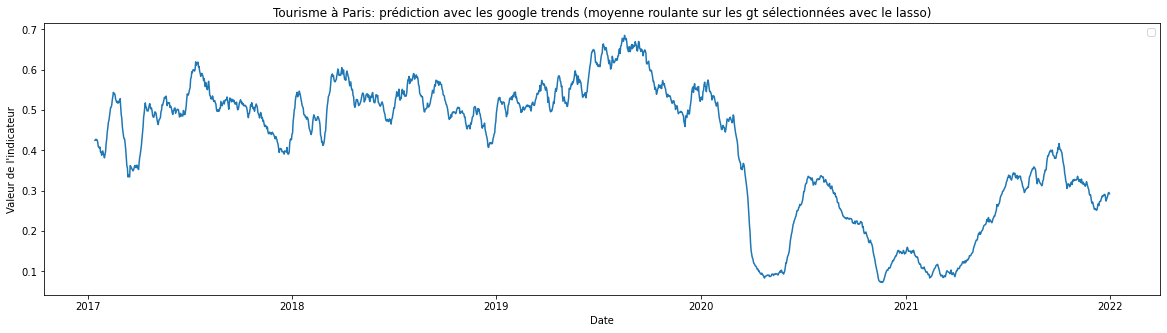

In [37]:
gt_moyenne(gt_paris)
plt.title('Tourisme à Paris: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en Hauts-de-Seine: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

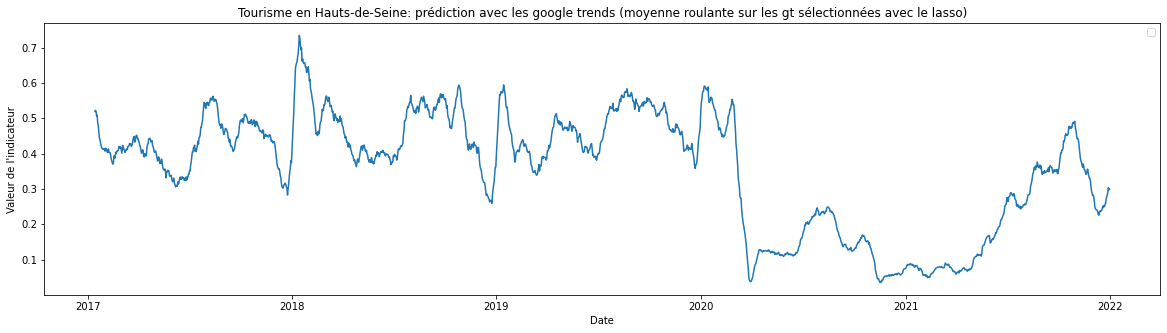

In [38]:
gt_moyenne(gt_disneyland)
plt.title('Tourisme en Hauts-de-Seine: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en PACA (côté Nice): prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

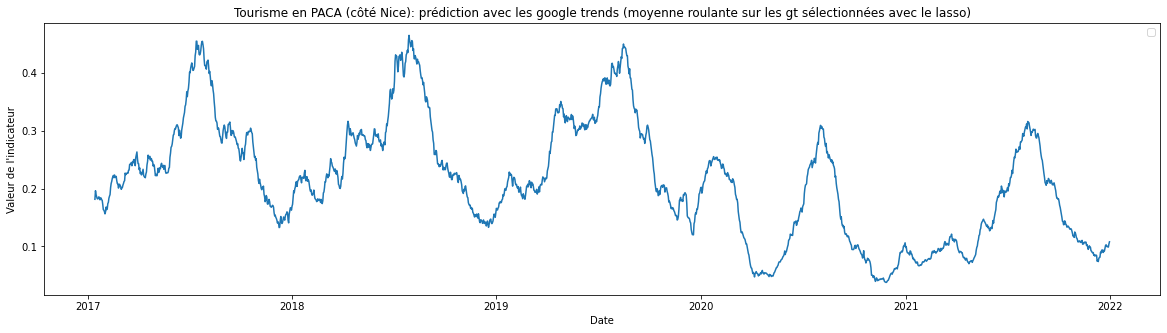

In [39]:
gt_moyenne(gt_paca_nice)
plt.title('Tourisme en PACA (côté Nice): prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en PACA (côté Marseille): prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

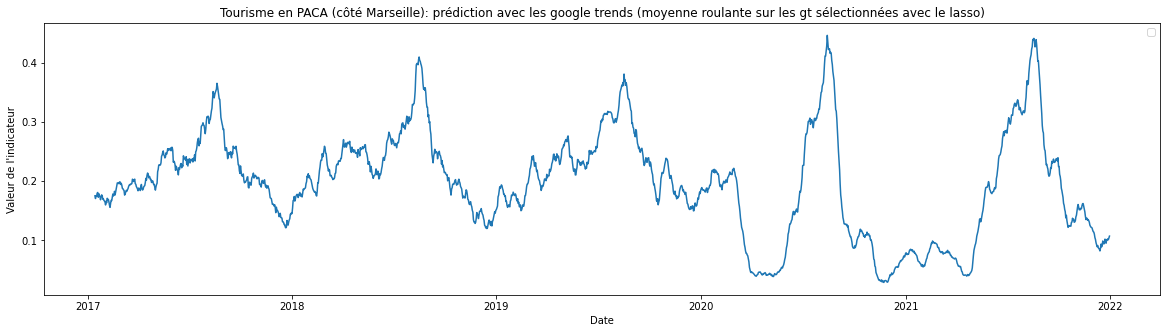

In [40]:
gt_moyenne(gt_paca_marseille)
plt.title('Tourisme en PACA (côté Marseille): prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en Rhône-Alpes: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

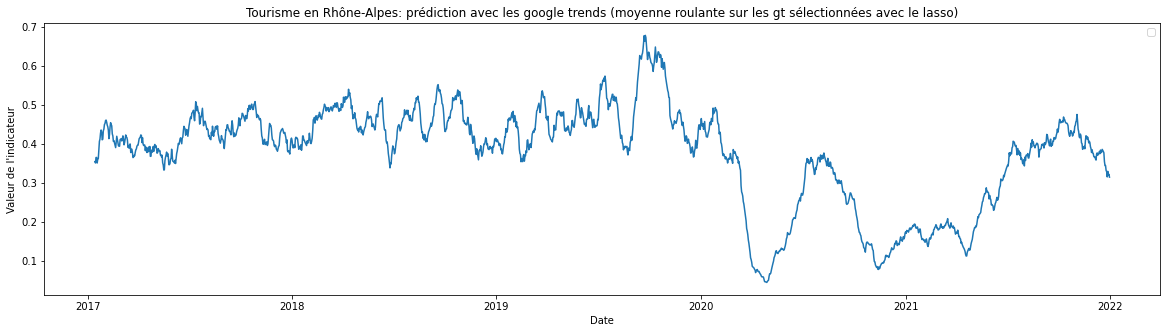

In [41]:
gt_moyenne(gt_rhône)
plt.title('Tourisme en Rhône-Alpes: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')

# On veut voir si la prise en compte d'une durée plus longue sans le covid modifie la sélection des google trends

In [42]:
gt_longer= pd.read_csv("google_trends_fr_longer.csv")

In [43]:
gt_longer['date']=pd.to_datetime(gt_longer['date'])
gt_longer = gt_longer.reset_index().pivot_table(values = "value", index = "date", columns = "variable")
gt_longer=gt_longer.reset_index()
gt_longer.head(5)

variable,date,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,arcachon theme_cat_voyages,biarritz theme_cat_voyages,bordeaux theme_cat_voyages,caen theme_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,...,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,perpignan theme_cat_voyages,promenade des anglais_cat_voyages,station de sport d hiver theme,strasbourg airport_cat_voyages,strasbourg hotel_cat_voyages,strasbourg restaurant_cat_voyages,strasbourg_cat_voyages
0,2010-01-01,22.55,8.91,4.94,13.6,32.45,16.50,24.84,86.33,64.38,...,44.53,30.24,58.40,27.73,0.0,75.00,0.00,4.10,0.0,17.28
1,2010-01-02,10.66,13.86,12.92,9.8,45.65,8.80,18.36,83.66,65.12,...,41.48,26.46,57.67,31.49,0.0,74.25,0.00,6.97,0.0,25.92
2,2010-01-03,28.70,26.07,8.17,15.0,38.50,22.00,35.28,67.64,73.26,...,43.92,45.99,69.35,32.43,8.1,67.50,0.00,26.24,0.0,35.04
3,2010-01-04,12.30,16.83,3.23,11.2,45.65,10.45,13.68,58.74,54.02,...,45.75,32.13,65.70,39.01,0.0,57.75,11.89,12.71,0.0,31.20
4,2010-01-05,18.86,11.88,6.27,14.4,42.35,27.50,36.00,42.72,48.84,...,43.92,28.98,59.86,35.25,0.0,58.50,11.60,10.25,0.0,37.92


In [44]:
# je standardise mes données 
gt_longer2=gt_longer.drop(["date"], axis=1)
gt_longer_std = (gt_longer2 - gt_longer2.min(axis=0)) / (gt_longer2.max(axis=0) - gt_longer2.min(axis=0))
gt_longer_dates=gt_longer[["date"]]

# je regroupe tout dans un seul database
gt_longer_std = gt_longer_std.merge(gt_longer_dates, how='inner', left_index=True, right_index=True)
gt_longer_std.head(5)

# je crée mes bdd pour chaque région touristique 
gt_paris_l= gt_longer_std[["date","aeroport paris_cat_voyages", "disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages","disneyland paris_cat_voyages","louvre_cat_voyages","paris gare_cat_voyages","paris hotel_cat_voyages","paris restaurant_cat_voyages","paris_cat_voyages"]]
gt_rhône_l= gt_longer_std[["date","lyon gare_cat_voyages", "lyon hotel_cat_voyages"]]
gt_paca_marseille_l= gt_longer_std[["date","marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages","marseille station_cat_voyages", "marseille_cat_voyages"]]
gt_paca_nice_l= gt_longer_std[["date","nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"]]
gt_disneyland_l= gt_longer_std[["date","disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages", "disneyland paris_cat_voyages"]]

# on regroupe par mois 
gt_paris2=standardiser(gt_paris_l)
gt_rhône2=standardiser(gt_rhône_l)
gt_paca_marseille2=standardiser(gt_paca_marseille_l)
gt_paca_nice2=standardiser(gt_paca_nice_l)
gt_disneyland2=standardiser(gt_disneyland_l)

# je fais la liste des départements par région:
departements_paris=["Paris"]
departements_disney=["Seine-et-Marne"]
departements_paca_nice=["Alpes-Maritimes", "Hautes-Alpes", "Alpes de Haute-Provence"]
departements_paca_marseille=["Bouches-du-Rhône", "Var","Vaucluse"]
departements_rhône=["Loire", "Rhône","Ain", "Haute-Savoie", "Ardèche", "Drôme", "Isère", "Savoie"]

paris_officiel = base_donnees_officielles_region(departements_paris,df_France_Official_Data2)
disneyland_officiel = base_donnees_officielles_region(departements_disney,df_France_Official_Data2)
paca_nice_officiel = base_donnees_officielles_region(departements_paca_nice,df_France_Official_Data2)
paca_marseille_officiel = base_donnees_officielles_region(departements_paca_marseille,df_France_Official_Data2)
rhone_officiel = base_donnees_officielles_region(departements_rhône,df_France_Official_Data2)

# On va fusionner les bases 
base_paris_l= paris_officiel.merge(gt_paris2, how="inner")
base_disney_l= disneyland_officiel.merge(gt_disneyland2, how="inner")
base_nice_l= paca_nice_officiel.merge(gt_paca_nice2, how="inner")
base_marseille_l= paca_marseille_officiel.merge(gt_paca_marseille2, how="inner")
base_rhone_l= rhone_officiel.merge(gt_rhône2, how="inner")

<ipython-input-8-dda1596a092e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['date'].dt.year
<ipython-input-8-dda1596a092e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['date'].dt.month
<ipython-input-8-dda1596a092e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [45]:
# si on fait le LASSO en prenant un échantillon train / test aléatoire
# fonction_lasso(base_paris_l) # on rejette l'utilisation de: paris hotel_cat_voyages et disneyland paris theme_cat_voyages
# fonction_lasso(base_disney_l) # on rejette l'utilisation de: disneyland paris_cat_voyages
# fonction_lasso(base_nice_l) # on ne rejette aucune utilisation
# fonction_lasso(base_marseille_l) # on rejette marseille gare_cat_voyages, mucem theme et marseille station_cat_voyages
# fonction_lasso(base_rhone_l) # on ne rejette aucune utilisation 

In [46]:
# si maintenant la sélection de l'échantillon train et de l'échantillon test ne sont plus aléatoires 


def fonction_lasso_non_aleatoire(df):

    """je définis mon vecteur cible y (à prédire) et mes variables (X, les google trends)"""
    """je définis mes échantillons de train et de test de manière non aléatoire: entrainement avant 2019, test après 2019 """
   
    X_train = df[df["Year-Month"]<="2018"]
    X_train=X_train.drop(["Year-Month"], axis = 1)
    X_train=X_train.drop(["value_in_thousands"], axis = 1).to_numpy()
    
    X_test = df[df["Year-Month"]>"2019"]
    X_test=X_test.drop(["Year-Month"], axis = 1)
    X_test=X_test.drop(["value_in_thousands"], axis = 1).to_numpy()
    
    
    y_train = df[df["Year-Month"]<="2018"]
    y_train=y_train.drop(["Year-Month"], axis = 1)
    y_train= y_train["value_in_thousands"].to_numpy()
    
    y_test= df[df["Year-Month"]>"2019"]
    y_test=y_test.drop(["Year-Month"], axis = 1)
    y_test= y_test["value_in_thousands"].to_numpy()
    


    pipeline = Pipeline([
                         ('scaler',StandardScaler()),
                         ('model',Lasso())
    ])

    search = GridSearchCV(pipeline,
                          {'model__alpha':np.arange(0.1,10,0.1)},
                          cv = 5, scoring="neg_mean_squared_error",verbose=3
                          )

    """entrainement"""  
    search.fit(X_train,y_train)
    search.best_params_
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)

    """test""" 
    search.fit(X_test,y_test)
    search.best_params_
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance_finale = np.abs(coefficients)
    importance_finale

    return importance_finale

In [47]:
# fonction_lasso_non_aleatoire(base_disney_l) # on rejette l'utilisation de: disneyland paris theme_cat_voyages
# fonction_lasso_non_aleatoire(base_paris_l) # on rejette l'utilisation de: disneyland paris_cat_voyages, paris hotel_cat_voyages, paris restaurant_cat_voyages
# fonction_lasso_non_aleatoire(base_nice_l) # on rejette cote d azur theme_cat_voyages french riviera_cat_voyages nice hotel_cat_voyages et nice_cat_voyages
# fonction_lasso_non_aleatoire(base_marseille_l) # on rejette marseille restaurant_cat_voyages
# fonction_lasso_non_aleatoire(base_rhone_l) # on ne rejette aucune utilisation 

In [48]:
gt_paris_l= gt_longer_std[["date","aeroport paris_cat_voyages", "disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages","disneyland paris_cat_voyages","louvre_cat_voyages","paris gare_cat_voyages","paris hotel_cat_voyages","paris restaurant_cat_voyages","paris_cat_voyages"]]
gt_rhône_l= gt_longer_std[["date","lyon gare_cat_voyages", "lyon hotel_cat_voyages"]]
gt_paca_marseille_l= gt_longer_std[["date","marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages","marseille station_cat_voyages", "marseille_cat_voyages"]]
gt_paca_nice_l= gt_longer_std[["date","nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"]]
gt_disneyland_l= gt_longer_std[["date","disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages", "disneyland paris_cat_voyages"]]

In [49]:
# modification des bases où des google trends ont été retirés: cas où on fait train/test aléatoire
gt_paris_l_a=gt_paris_l.drop(["paris hotel_cat_voyages","disneyland paris theme_cat_voyages"], axis=1)
gt_disneyland_l_a=gt_disneyland_l.drop(["disneyland paris_cat_voyages"], axis=1)
gt_paca_nice_l_a=gt_paca_nice_l
gt_rhône_l_a=gt_rhône_l
gt_paca_marseille_l_a=gt_paca_marseille_l.drop(["marseille gare_cat_voyages", "mucem theme","marseille station_cat_voyages"], axis=1)

# modification des bases où des google trends ont été retirés: cas où on fair le train/test non aléatoire
gt_paris_l_na=gt_paris_l.drop(["disneyland paris_cat_voyages","paris hotel_cat_voyages", "paris restaurant_cat_voyages"], axis=1)
gt_disneyland_l_na=gt_disneyland_l.drop(["disneyland paris theme_cat_voyages"], axis=1)
gt_paca_nice_l_na=gt_paca_nice_l.drop(["cote d azur theme_cat_voyages", "french riviera_cat_voyages", "nice hotel_cat_voyages","nice_cat_voyages"], axis=1)
gt_rhône_l_na=gt_rhône_l
gt_paca_marseille_l_na=gt_paca_marseille_l.drop(["marseille restaurant_cat_voyages"], axis=1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme à Paris: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

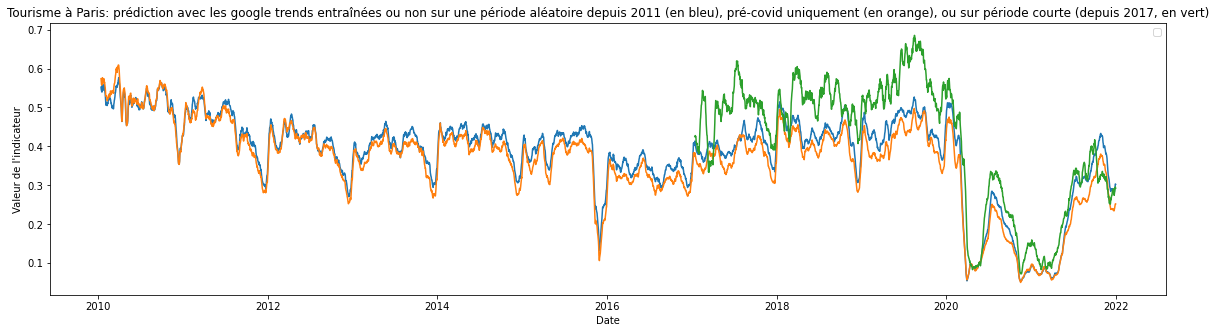

In [50]:
gt_moyenne(gt_paris_l_a)
gt_moyenne(gt_paris_l_na)
gt_moyenne(gt_paris)
plt.title('Tourisme à Paris: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme dans les Hauts-de-Seine: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

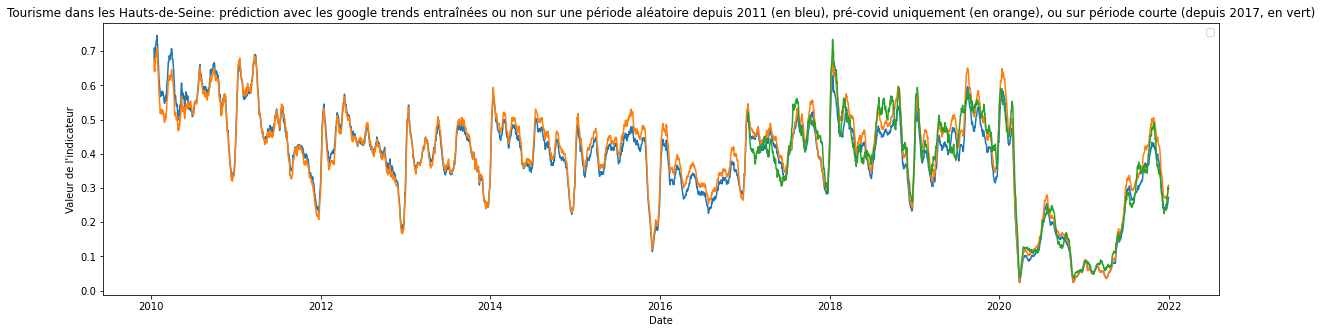

In [51]:
gt_moyenne(gt_disneyland_l_a)
gt_moyenne(gt_disneyland_l_na)
gt_moyenne(gt_disneyland)
plt.title('Tourisme dans les Hauts-de-Seine: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en PACA (côté Marseille): prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

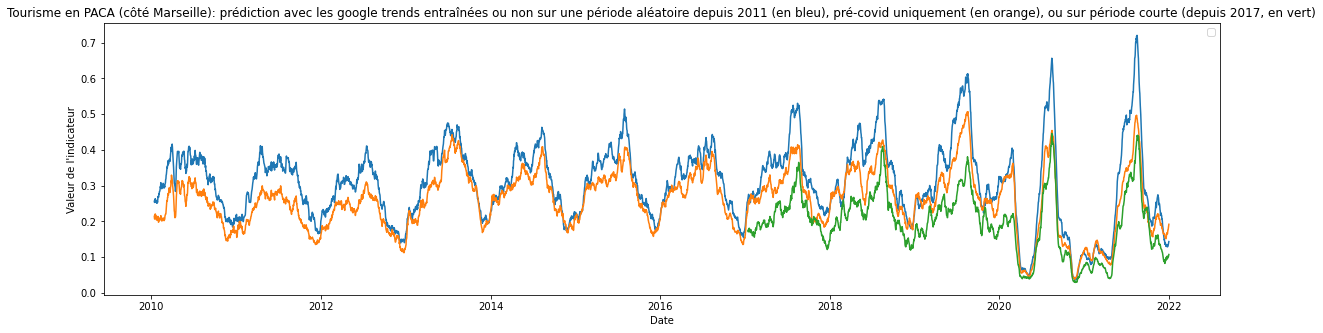

In [52]:
gt_moyenne(gt_paca_marseille_l_a)
gt_moyenne(gt_paca_marseille_l_na)
gt_moyenne(gt_paca_marseille)
plt.title('Tourisme en PACA (côté Marseille): prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme en PACA (côté Nice): prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

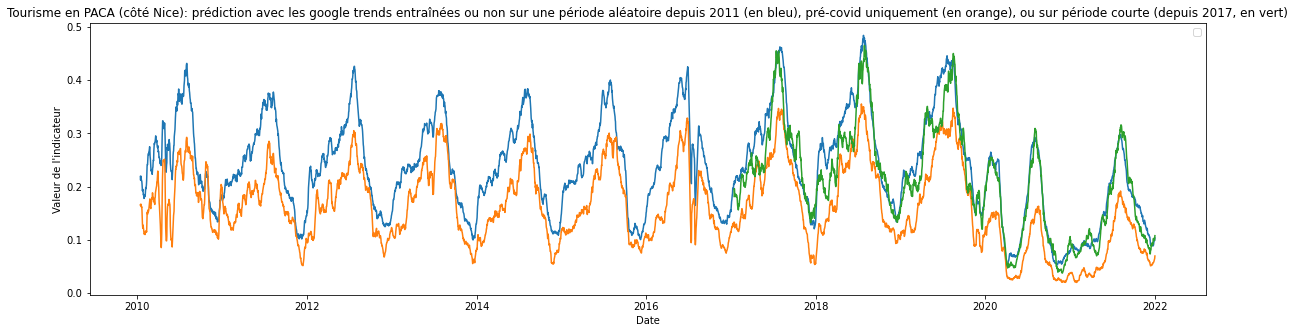

In [53]:
gt_moyenne(gt_paca_nice_l_a)
gt_moyenne(gt_paca_nice_l_na)
gt_moyenne(gt_paca_nice)
plt.title('Tourisme en PACA (côté Nice): prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 (en bleu), pré-covid uniquement (en orange), ou sur période courte (depuis 2017, en vert)')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Tourisme dans le rhône-alpes: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 ou pré-covid uniquement (en orange), ou sur période courte (depuis 2017, vert)')

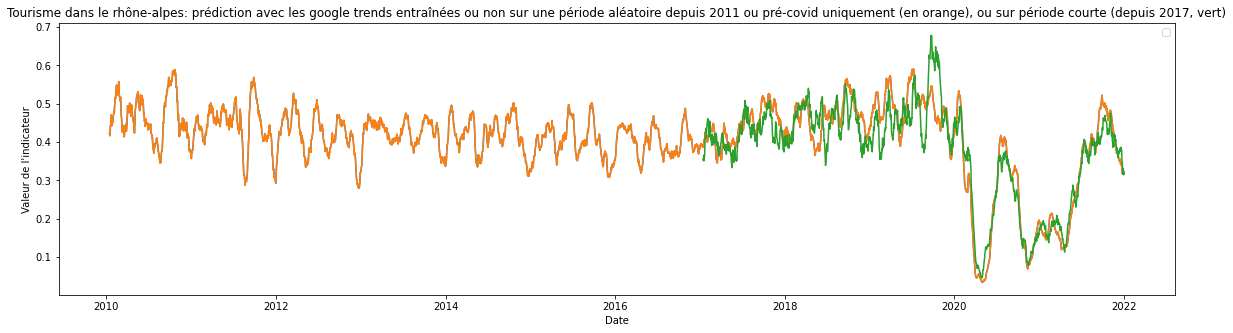

In [54]:
gt_moyenne(gt_rhône_l_a)
gt_moyenne(gt_rhône_l_na)
gt_moyenne(gt_rhône)
plt.title('Tourisme dans le rhône-alpes: prédiction avec les google trends entraînées ou non sur une période aléatoire depuis 2011 ou pré-covid uniquement (en orange), ou sur période courte (depuis 2017, vert)')